*(Edited by David I. Inouye for classroom use)  The text has been removed and the code has been edited and reordered as seemed appropriate.*

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# PCA for visualization: Hand-written digits

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
X = digits.data
X = X - np.mean(X, axis=0)
y = digits.target
print(X.shape)

(1797, 64)


# Let's try some random projections of the data

In [4]:
def show_projected(projected, y, ax=None):
    if ax is None:
        ax = plt.gca()
    sc = ax.scatter(projected[:, 0], projected[:, 1],
                c=y, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Spectral', 10))
    ax.set_xlabel('component 1')
    ax.set_ylabel('component 2')
    plt.colorbar(sc, ax=ax)
    return sc

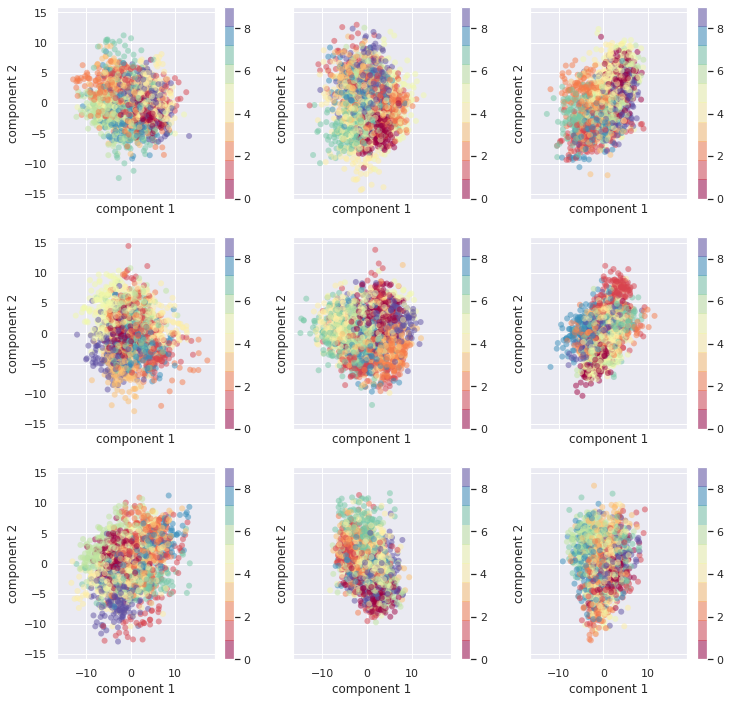

In [6]:
rng = np.random.RandomState(0)
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12), sharex=True, sharey=True)
for ax in axes.ravel():
    # Generate random projection matrix
    A = rng.randn(X.shape[1], 2)
    Q, _ = np.linalg.qr(A)
    Z = np.dot(X, Q)
    sc = show_projected(Z, y, ax=ax)
#plt.colorbar(sc)

# Now let's use Principal Component Analysis (PCA)

(1797, 64)
(1797, 2)


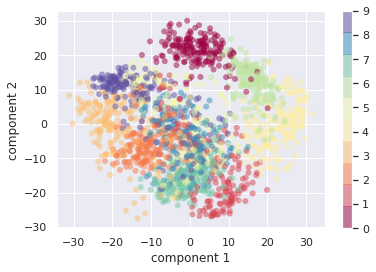

In [7]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Notice that the limits of the component are [-30, 30] rather than [-10, 10]

# Minimum reconstruction error / dimensionality reduction viewpoint of PCA

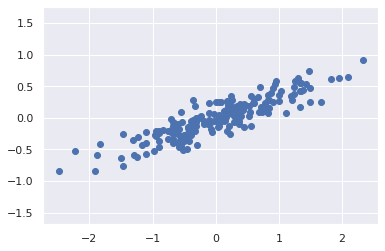

In [8]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

original shape:    (200, 2)
transformed shape: (200, 1)


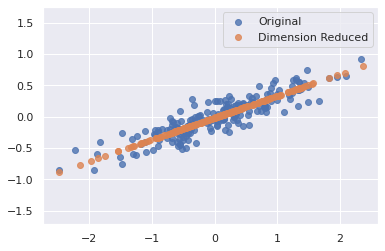

In [9]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.8, label='Original')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label='Dimension Reduced')
plt.axis('equal');
plt.legend()

# If we keep all components, then we get perfect reconstruction

original shape:    (200, 2)
transformed shape: (200, 2)


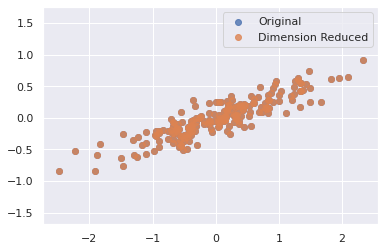

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.8, label='Original')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label='Dimension Reduced')
plt.axis('equal');
plt.legend()

# Maximum variance of projected data viewpoint of PCA

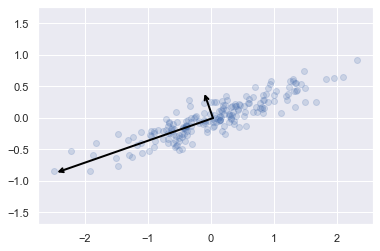

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

#print(pca.components_)
#print(pca.explained_variance_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

# Amount of variance explained (first components are most interesting)
## (On digits data)

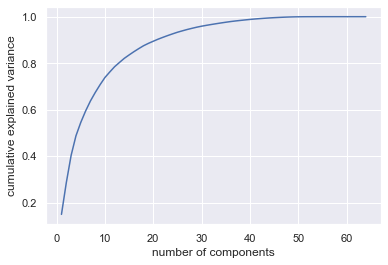

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.arange(64)+1, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Example: PCA as Noise Filtering

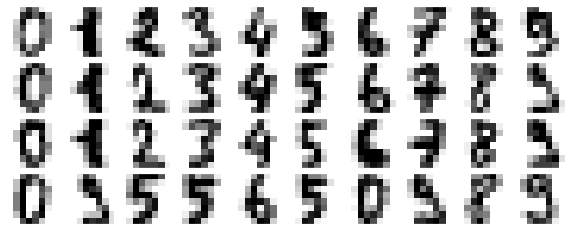

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

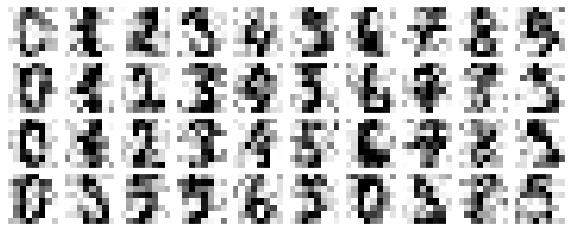

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

(1797, 64)
(1797, 12)
(1797, 64)


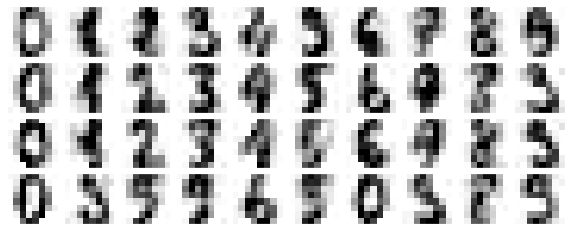

In [ ]:
pca = PCA(12).fit(noisy)
print(noisy.shape)
scores = pca.transform(noisy)
print(scores.shape)
filtered = pca.inverse_transform(scores)
print(filtered.shape)
plot_digits(filtered)

# Example: Eigenfaces

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

# Eigenfaces are the principal components of the faces dataset

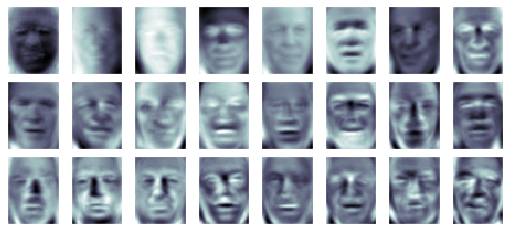

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [ ]:
# Compute the components and projected faces
scores = pca.transform(faces.data)
projected = pca.inverse_transform(scores)

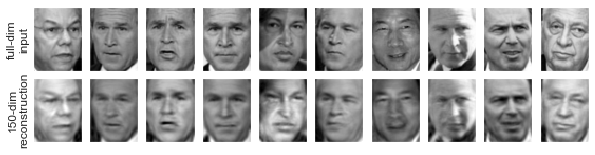

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');